## EMPLOYEE PERFORMANCE ANALYSIS


INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. INX human resource policies are considered as employee friendly and widely perceived as best practices in the industry.

## PROBLEM STATEMENT

Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. There has been increased escalations on service delivery and client satisfaction levels came down by 8 percentage points.

**BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE**

## OBJECTIVE
- Find the core underlying causes of this performance issues.
- Clear indicators of non performing employees, so that any penalization of non-performing employee, if required.



### EXPLORATORY DATA ANALYSIS SUMMARY:
* Basic checks of data
* Examine the data
* Statistical measures of data
* Department Wise performance 
* Percent count of employee department with performance rating
* Top 3 Important Factors effecting employee performance
* Checking the distribution of continuous features
* Check skewnwness and kurtosis
* Distribution of mean of data
* Distribution of standard deviation of data

#### IMPORTING NECESSARY LIBRARY:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from scipy import stats

import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

print("Packages imported Successfully!")

#

Packages imported Successfully!


#### LOAD DATA FOR EXPLOTARY DATA ANALYSIS

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
pd.set_option('display.max_columns',None) # Used to display the all features

#### BASIC CHECKS OF DATA

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [4]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [5]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [6]:
data.shape

(1200, 28)

* Dataset contain total 28 features with 1 unique feature and 1200 observation.

### EXAMINE THE DATA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

* In this data two type of data is available [int64, object]

Some categorical columns are encoded as follows:

- Emp education level: 1-- Below college, 2-- College, 3-- Bachelor, 4-- Master, 5-- Doctor
- Emp environ satisfaction: 1-- Low, 2-- Medium, 3-- High, 4-- Very High
- Emp job involvment: 1-- Low, 2-- Medium, 3-- High, 4-- Very High
- Emp job satisfaction: 1-- Low, 2-- Medium, 3-- High, 4-- Very High
- Performance rating: 1-- Low, 2-- Good, 3-- Excellent, 4-- Outstanding
- Relationship satisfaction: 1- Low, 2-- Medium, 3-- High, 4-- Very High
- Emp work life balance: 1- Bad, 2-- Good, 3-- Better, 4-- Best

### STATISTICAL MEASURE OF DATA

In [8]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


* In numerical features no constant column is present.

In [9]:
#To check whether there is any absurd value to clean

print('UNIQUE VALUES: \n')
for i in data.columns:
    print(i,':', data[i].unique())

UNIQUE VALUES: 

EmpNumber : ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Age : [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DistanceFr

In [10]:
data.describe(include="O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


* In categorical data also no constant column is present.

### DEPARTMENT WISE PERFORMANCE RATING

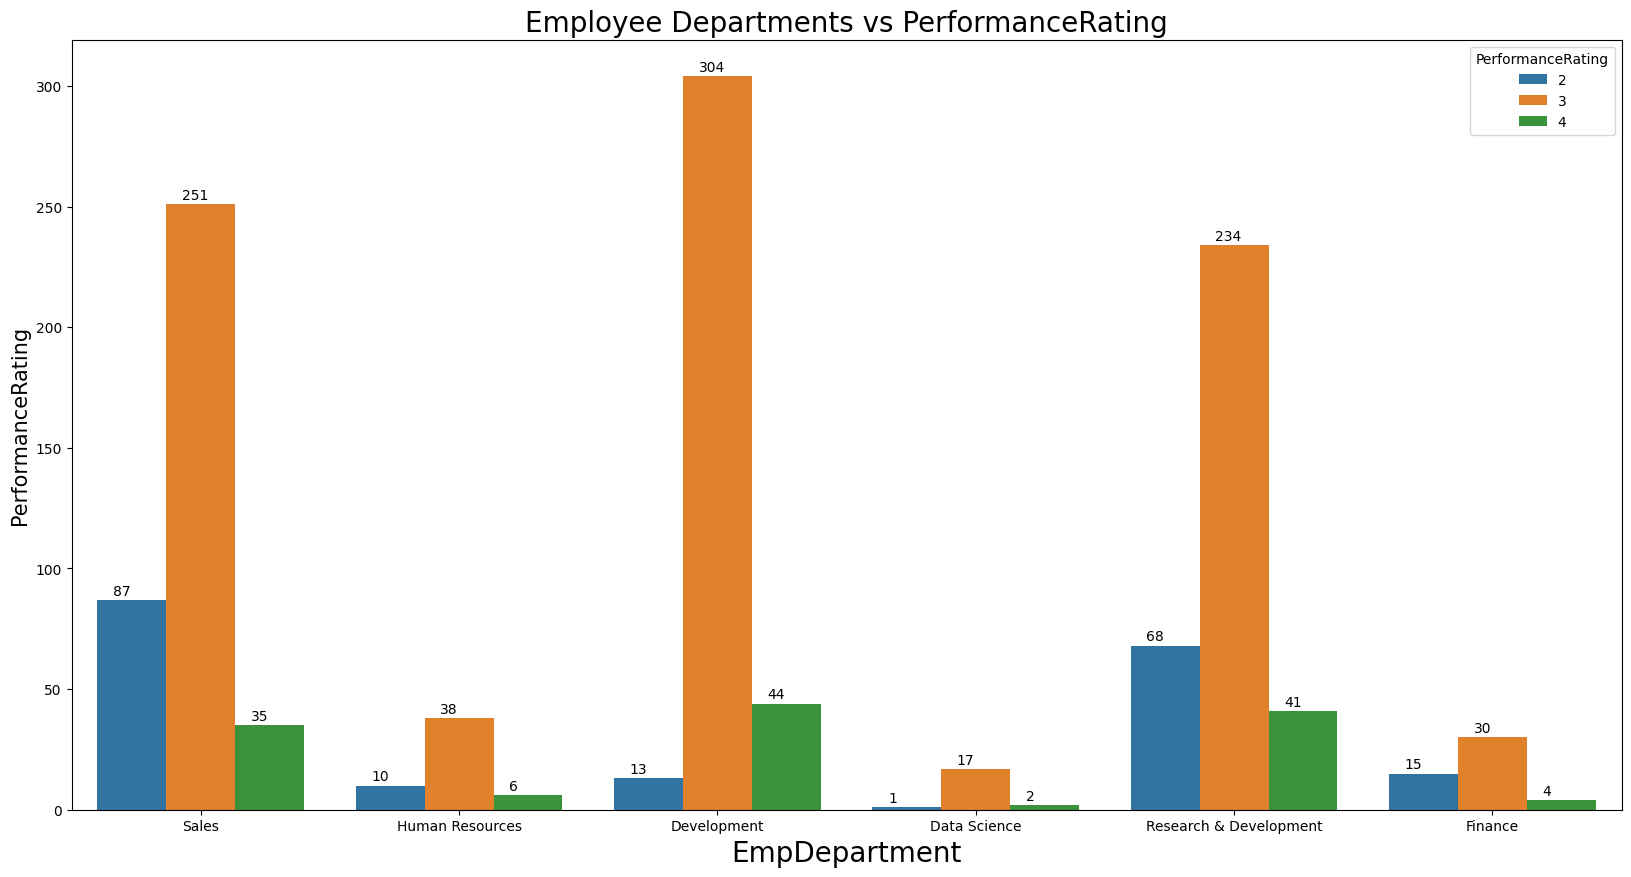

In [11]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()


**Observation:**

**From the above graph we can conclude that from the EmpDepartment Development department is showing High performance rating**

**Sales:** The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

**Human Resources:** The majority of the employees lying under the level 3 performance . The older people are performing low in this department. The female employees in HR department doing really well in their performance.

**Development:** The maximum number of employees are level 3 performers. Employees of all age are performing at the level of 3 only. The gender-based performance is nearly same for both.

**Data Science:** The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.

**Research & Development:** The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

**Finance:** The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.

#### PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING

In [12]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


### So from the below data we got clear indication of those employees who have low performance, low job involvement and have less or equal to 2 years of experience.¶

In [13]:
# Filtering those employees whose performance rating is low but working in thiscompany for less or equal to 2 years

low_per = data.loc[(data['PerformanceRating'] == 2) & (data['Attrition'] == 'No') & (data['EmpJobInvolvement']<= 2)
                  & (data['ExperienceYearsAtThisCompany'] <= 2),
                  ['EmpNumber','ExperienceYearsAtThisCompany','EmpJobInvolvement','Attrition','PerformanceRating']]
low_per

,EmpNumber,ExperienceYearsAtThisCompany,EmpJobInvolvement,Attrition,PerformanceRating
165,E1001300,2,2,No,2
182,E1001322,2,2,No,2
605,E1002079,2,2,No,2
728,E1002291,2,2,No,2
878,E100461,2,2,No,2
1023,E100702,2,2,No,2


**So, As per our Goal--2, those 6 non performing employees can be penalized or given final warning for their performance.**

In [14]:
#To analyse on performance as per department & environment satisfaction wise

pivot1 = data.pivot_table(index = 'EmpDepartment', values = 'EmpEnvironmentSatisfaction',
                         columns = 'PerformanceRating', aggfunc='mean')
pivot1

PerformanceRating,2,3,4
EmpDepartment,,,
Data Science,1.000000,3.058824,3.000000
Development,1.461538,2.726974,2.954545
Finance,1.600000,3.333333,3.750000
Human Resources,1.600000,2.842105,3.000000
Research & Development,1.602941,3.038462,3.219512
Sales,1.586207,2.968127,3.028571


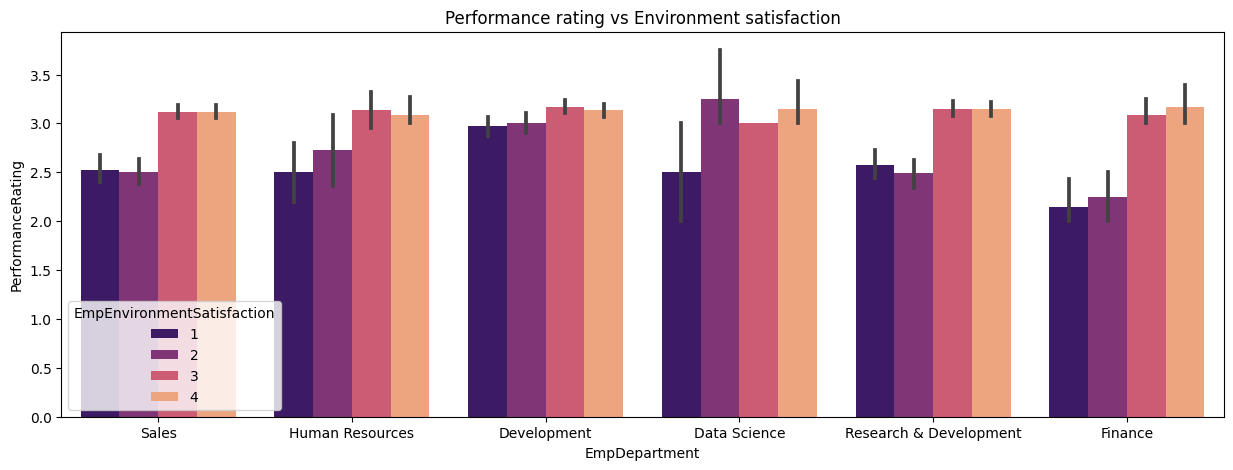

In [15]:
plt.subplots(figsize=(15, 5))
bar = sns.barplot(data = data, x= 'EmpDepartment', y = 'PerformanceRating',hue= 'EmpEnvironmentSatisfaction',
                  palette = 'magma').set(title = "Performance rating vs Environment satisfaction")

**We can see that when environment satisfaction is low, performance is low.**

[Text(0.5, 1.0, 'Distribution of performance rating by each department.')]

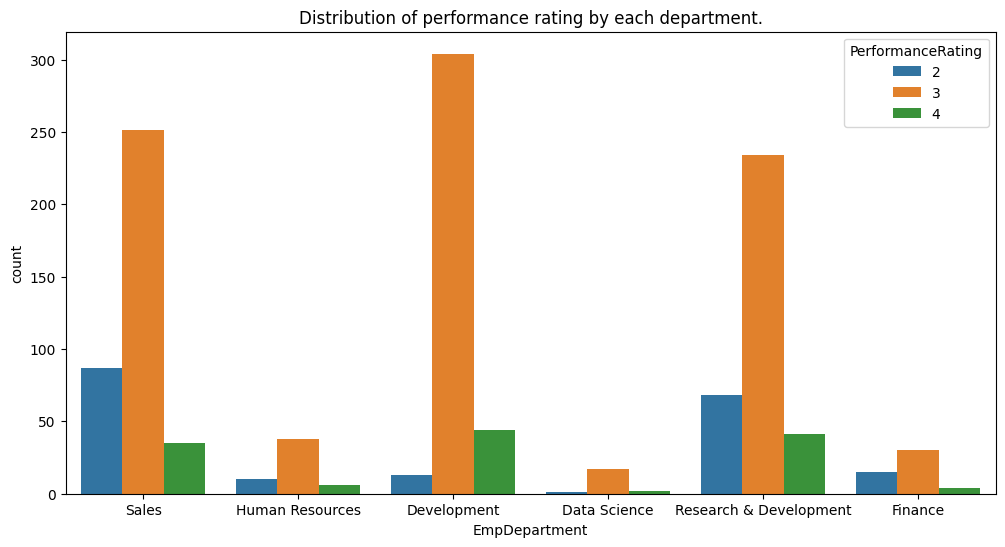

In [16]:
# Analyze each department separately

plt.subplots(figsize=(12, 6))
count = sns.countplot(data= data, x='EmpDepartment',hue = 'PerformanceRating', linewidth=0 )
count.set(title = 'Distribution of performance rating by each department.')


[Text(0.5, 1.0, 'Relation between Salary hike & Performance rating')]

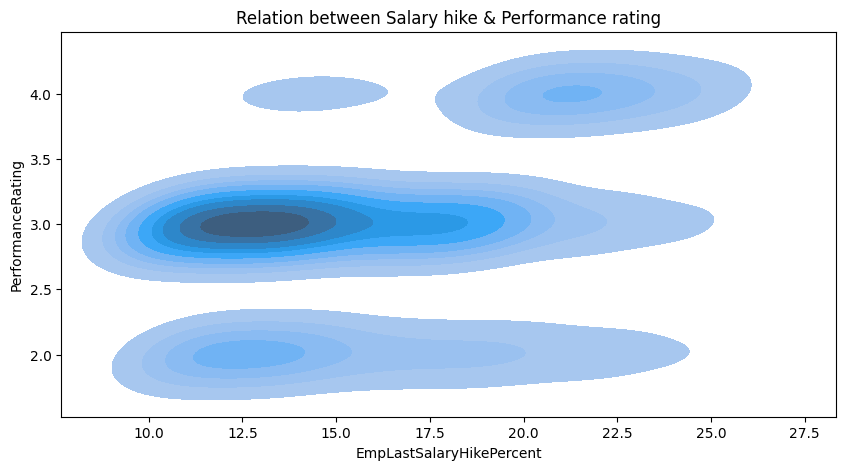

In [17]:
# Analysis of performance rating as per Salary hike

plt.subplots(figsize=(10, 5))
kde = sns.kdeplot(data=data, x="EmpLastSalaryHikePercent", y ='PerformanceRating',multiple="stack",
                  palette = 'viridis', fill = True, linewidth = 0)
kde.set(title = 'Relation between Salary hike & Performance rating')

**We can clearly observe that where salary hike is low, performance rating is low.**

In [18]:
#Performance rating as per job involvement & job satisfaction

fig = px.pie(data, values='EmpJobSatisfaction', names= 'PerformanceRating', color= 'EmpJobInvolvement',
            title = 'Performance rating as per job involvement & job satisfaction',width=600, height=400)
fig.show()

**We can see that 11% and 16.3% of employees having low job satisfaction and job involvement have low performance ratings**

[Text(0.5, 1.0, 'Performance rating Job Role wise')]

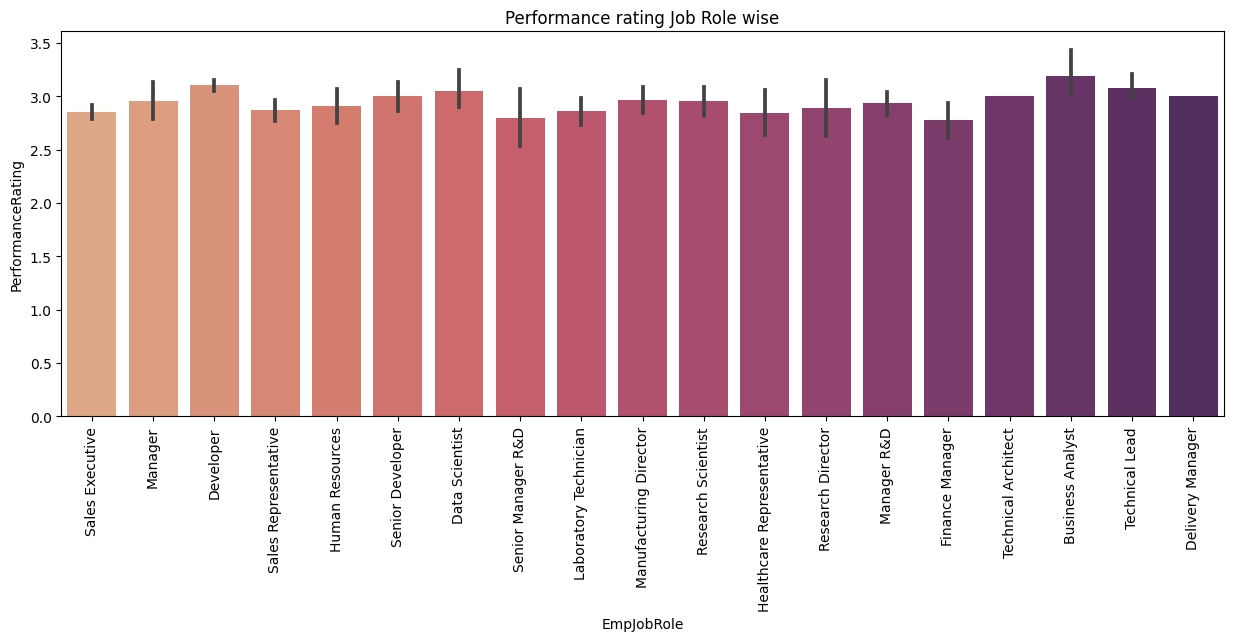

In [19]:
# Analysis of performance rating employee role wise

plt.subplots(figsize=(15, 5))
bar = sns.barplot(data= data, x='EmpJobRole', y='PerformanceRating', palette = 'flare')
plt.xticks(rotation=90)
bar.set(title = 'Performance rating Job Role wise')

[Text(0.5, 1.0, 'Performance rating Experience wise')]

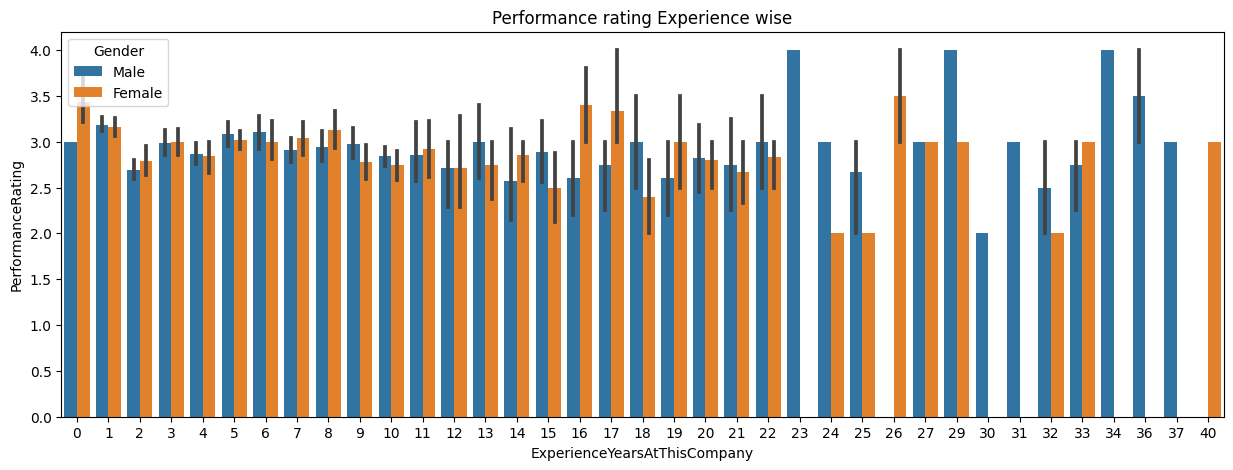

In [20]:
# Analysis experience wise

plt.subplots(figsize=(15, 5))
bar = sns.barplot(data= data, x='ExperienceYearsAtThisCompany', y='PerformanceRating',
                  hue = 'Gender')
bar.set(title = 'Performance rating Experience wise')

In [21]:
# 2.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


In [22]:
# 3.Employee Work life balance
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


### TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

**From visualisation file we get the top 3 factor affecting to the employee performance**
1. Emp Environment Satisfaction
2. Emp Last Salary Hike Percent
3. Emp Work Life Balance

From above visualization, we can clearly observe that Salary hike, Environment satisfaction,Job satisfaction, Employee experience marked great impact on Performance ratings. So, from management side, they need to look after in these matters to increase the employees performance

**Observation:**

**1.Employee Enviroment satisfaction:** 
* Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.

**2.Employee last salary hike percent:** 
* More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time.
* Employees whose salary hike percentage is in between 20-22%, There performance rating is 4

**3.Employee work life balance:** 
* In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees


**Overall view**

From above visualization, we can clearly observe that Salary hike, Environment satisfaction,Job satisfaction, Employee experience marked great impact on Performance ratings. So, from management side, they need to look after in these matters to increase the employees performance